Параметры:
- *crim* - уровень преступности на душу населения по районам,
- *zn* - доля жилых земель, зонированных под участки площадью более 25 000 кв. футов,
- *indus* - доля неторговых площадей на город,
- *chas* - фиктивная переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае),
- *nox* - концентрация оксида азота (частей на 10 миллионов),
- *rm* - среднее количество комнат в жилом доме,
- *age* - доля жилых единиц, построенных до 1940 г.,
- *dis* - взвешенное расстояние до пяти центров занятости Бостона,
- *rad* - индекс доступности радиальных магистралей,
- *tax* - полная ставка налога на имущество на 10 000 долларов США,
- *ptratio* - соотношение учеников и учителей по городам,
- *black* - 1000(Bk — 0,63)², где Bk — доля (лиц афроамериканского происхождения) на город,
- *lstat* - процент населения с более низким статусом,
- *medv* - средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

Цены на дом указаны переменной MEDV наша целевая переменная, а остальные переменные - функции на основании которых мы будем прогнозировать стоимость дома.

<a id="2"></a>
## Подключение библиотек для анализа данных

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import math
import matplotlib.pyplot as plt 

warnings.simplefilter('ignore')

<a id="3"></a>
## Загрузка датасета из файла `boston_housing.csv`

In [2]:
boston_housing = pd.read_csv("boston_housing.csv")

<a id="4"></a>
<br></br>
# 2) Основные характеристики датасета

Выведем первые 5 строк датасета для проверки корректного импорта данных:

In [3]:
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Видим, что данные загружены корректно. Разбиения по строкам и столбцам произведены верно.

Узнаем размер датасета:

In [4]:
print(f'Количество записей: {boston_housing.shape[0]}\nКоличество параметров: {boston_housing.shape[1]}')

Количество записей: 506
Количество параметров: 14


Посмотрим краткую информацию обо всех параматрах датасета:

In [5]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Видим, что в датасете присутствуют данные нескольких типов: целочисленные ( `int64` ) и вещественные ( `float64` ). Также узнаём, что в каждом столбце присутствует ровно `506` значения, следовательно у нас отсутствуют пустые ячейки, что говорит об отсутствии явных пропусков данных в датасете.

<a id="6_1"></a>
## Пропущенные данные

In [6]:
for column in boston_housing.columns:
    print(f'{column}: {boston_housing[column].isnull().sum()} null values')

crim: 0 null values
zn: 0 null values
indus: 0 null values
chas: 0 null values
nox: 0 null values
rm: 0 null values
age: 0 null values
dis: 0 null values
rad: 0 null values
tax: 0 null values
ptratio: 0 null values
black: 0 null values
lstat: 0 null values
medv: 0 null values


In [7]:
# Основные статистические характеристки набора данных
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Определим уникальные значения для целевого признака
boston_housing['medv'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

<a id="10"></a>
# 3) Визуальное исследование датасета

Сначала построим распределение целевой переменной MEDV, для этого будем использовать distplot функция из seaborn библиотеки.

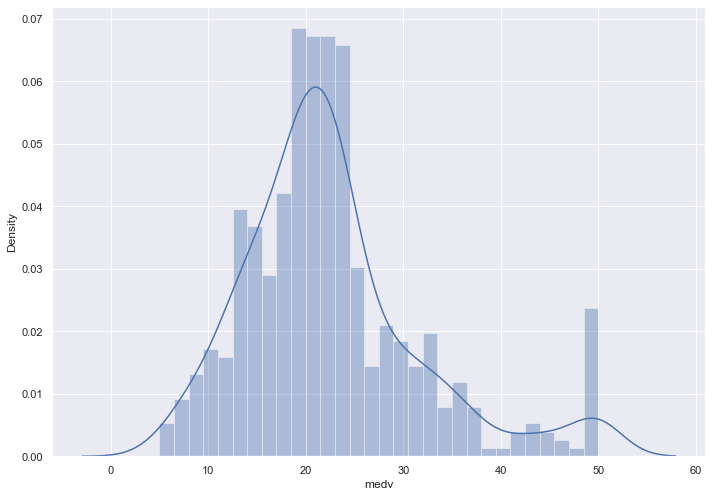

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_housing["medv"], bins=30)
plt.show()

Мы видим, что значения MEDV распределяются нормально с небольшим количеством выбросов.
Теперь можно попробовать проследить зависимость уровня преступности от стоимости жилья.

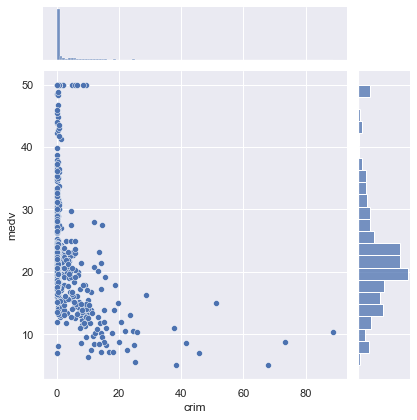

In [10]:
sns.jointplot(x="crim",y="medv",data=boston_housing)

<AxesSubplot:xlabel='medv'>

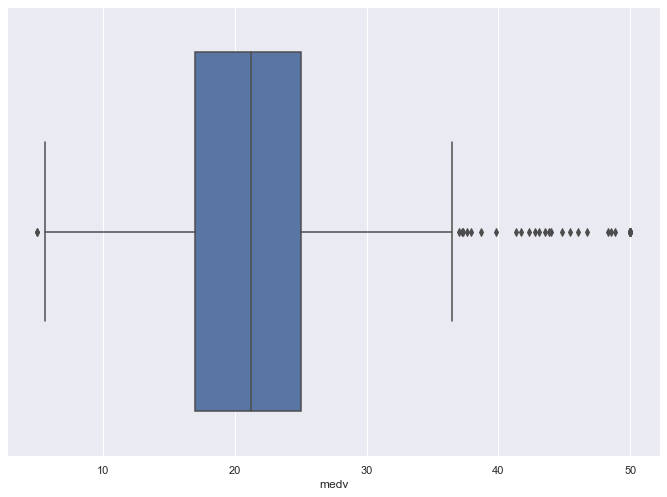

In [11]:
sns.boxplot(boston_housing["medv"],orient = "v")

Как можно заметить по диаграмме, наибольший уровень преступности зафиксирован в районах со средней стоимостью жилья.

Распределение переменной RM, среднее количество жилых комнат в доме.

<AxesSubplot:xlabel='rm', ylabel='Density'>

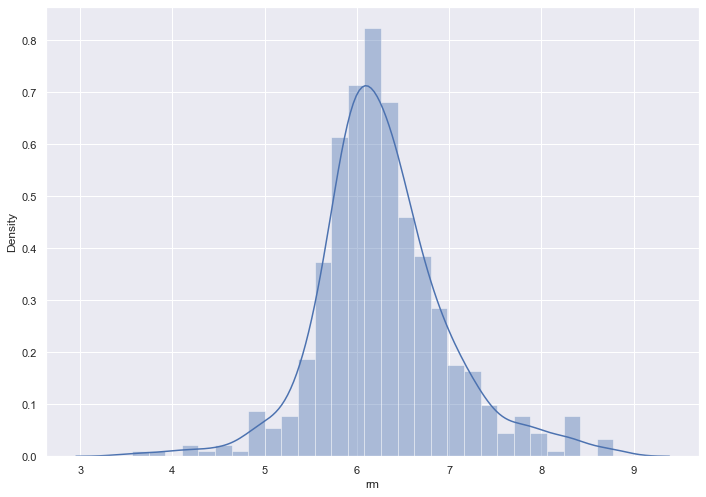

In [14]:
sns.distplot(boston_housing["rm"],kde=True)

Распределение переменной RM, среднее количество жилых комнат в доме, и корреляция этого занчения относительно целевой переменной MEDV.

In [15]:
 boston_housing["rm_int"] = boston_housing["rm"].map(math.floor) 

<AxesSubplot:xlabel='rm_int', ylabel='medv'>

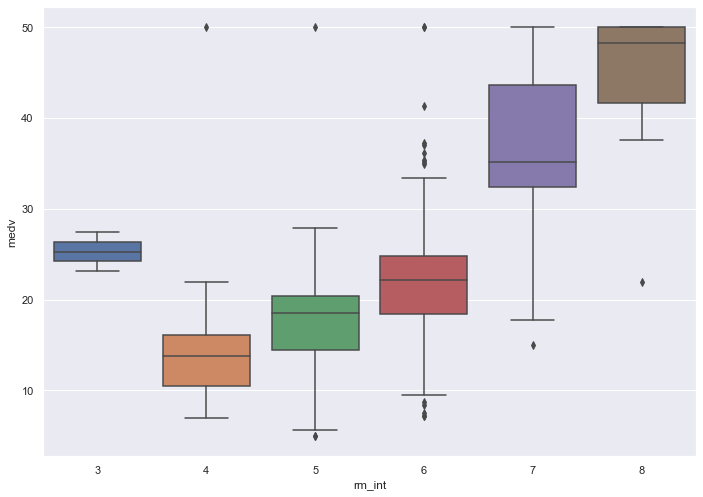

In [16]:
sns.boxplot(x="rm_int", y = "medv",data = boston_housing, orient="v")

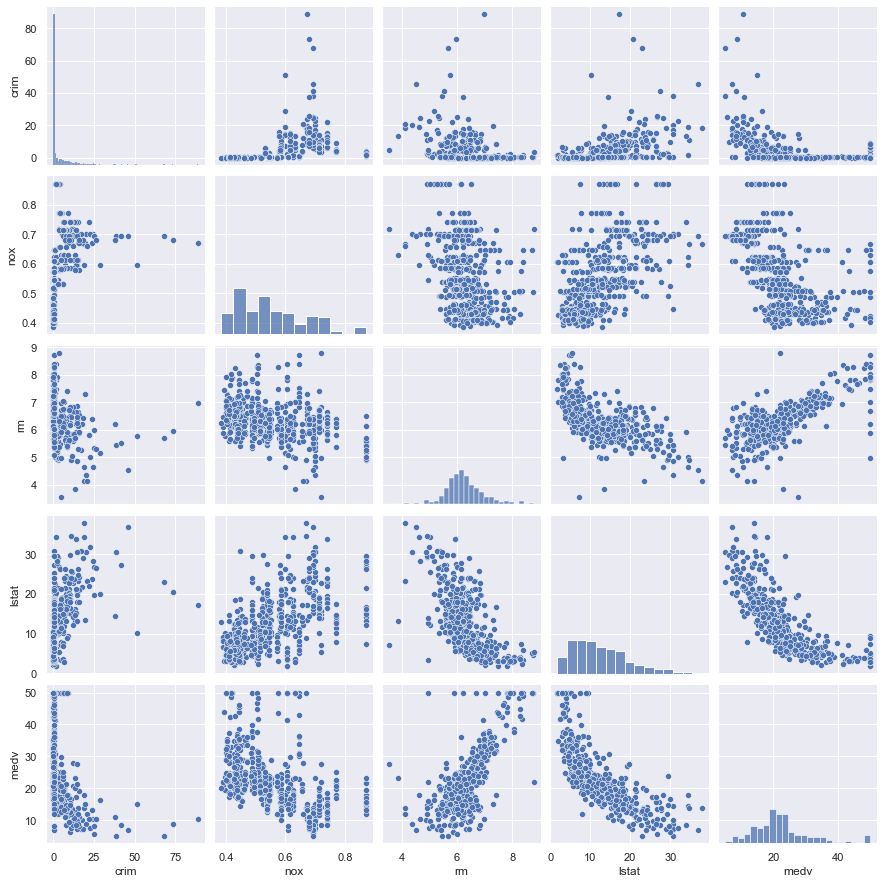

In [20]:
sns.pairplot(boston_housing[["crim","nox","rm","lstat","medv"]])

<a id="13"></a>
# 4) Информация о корреляции признаков

Создаем матрицу корреляции, которая измеряет линейные отношения между переменными.

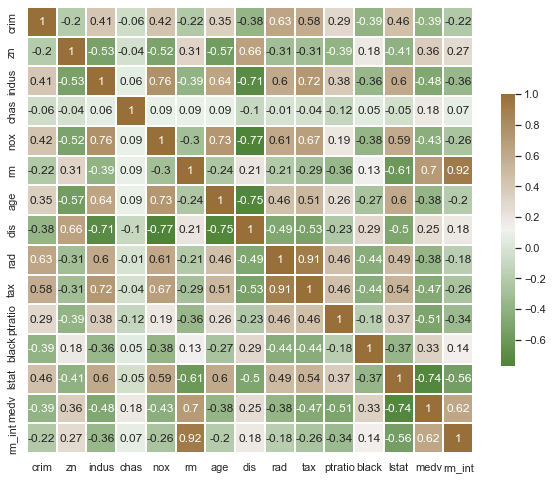

In [24]:
corr = boston_housing.corr().round(2)
f, ax = plt.subplots(figsize=(10, 10)) 
cmap = sns.diverging_palette(120, 50, as_cmap=True) 
sns.heatmap(data=corr, cmap=cmap, annot=True, vmax=1.0, square=True, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)#, vmax=1.0, square=True, xticklabels=2, yticklabels=2, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax) 
plt.show()

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию.
